In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 1000)

# Contents

1. Reports
2. Report Drugs
3. Drug Ingredients
4. Reactions
5. Merge Dataframes
6. Limit to Active Ingredients in SIDER/DrugBank

In [3]:
data_dir = '..\data\\'

# 1. Reports

In [4]:
# import data

reports = pd.read_csv(data_dir + 'CVADR/reports.txt',
                      delimiter='$',
                      header=None,
                      names=['REPORT_NO', 'E2B_IMP_SAFETYREPORT_ID', 'VERSION_NO', 'DATRECEIVED', 'DATINTRECEIVED', 'MAH_NO', 'REPORT_TYPE_CODE', 'REPORT_TYPE_ENG', 'REPORT_TYPE_FR', 'GENDER_CODE', 'GENDER_ENG', 'GENDER_FR', 'AGE', 'AGE_Y', 'AGE_UNIT_ENG', 'AGE_UNIT_FR', 'OUTCOME_CODE', 'OUTCOME_ENG', 'OUTCOME_FR', 'WEIGHT', 'WEIGHT_UNIT_ENG', 'WEIGHT_UNIT_FR',
                             'HEIGHT', 'HEIGHT_UNIT_ENG', 'HEIGHT_UNIT_FR', 'SERIOUSNESS_CODE', 'SERIOUSNESS_ENG', 'SERIOUSNESS_FR', 'DEATH', 'DISABILITY', 'CONGENITAL_ANOMALY', 'LIFE_THREATENING', 'HOSP_REQUIRED', 'OTHER_MEDICALLY_IMP_COND', 'REPORTER_TYPE_ENG', 'REPORTER_TYPE_FR', 'SOURCE_CODE', 'SOURCE_ENG', 'SOURCE_FR', 'UNKNOWN_1', 'UNKNOWN_2', 'UNKNOWN_3'],
                      dtype={'REPORT_NO': 'object', 'E2B_IMP_SAFETYREPORT_ID': 'object', 'VERSION_NO': 'int64', 'MAH_NO': 'object', 'REPORT_TYPE_CODE': 'category', 'REPORT_TYPE_ENG': 'category', 'REPORT_TYPE_FR': 'category', 'GENDER_CODE': 'category', 'GENDER_ENG': 'category', 'GENDER_FR': 'category', 'AGE': 'float64', 'AGE_Y': 'float64', 'AGE_UNIT_ENG': 'category', 'AGE_UNIT_FR': 'category', 'OUTCOME_CODE': 'category', 'OUTCOME_ENG': 'category', 'OUTCOME_FR': 'category', 'WEIGHT': 'float64', 'WEIGHT_UNIT_ENG': 'object', 'WEIGHT_UNIT_FR': 'object', 'HEIGHT': 'float64',
                             'HEIGHT_UNIT_ENG': 'object', 'HEIGHT_UNIT_FR': 'object', 'SERIOUSNESS_CODE': 'category', 'SERIOUSNESS_ENG': 'category', 'SERIOUSNESS_FR': 'category', 'DEATH': 'category', 'DISABILITY': 'category', 'CONGENITAL_ANOMALY': 'category', 'LIFE_THREATENING': 'category', 'HOSP_REQUIRED': 'category', 'OTHER_MEDICALLY_IMP_COND': 'category', 'REPORTER_TYPE_ENG': 'category', 'REPORTER_TYPE_FR': 'category', 'SOURCE_CODE': 'category', 'SOURCE_ENG': 'category', 'SOURCE_FR': 'category', 'UNKNOWN_1': 'object', 'UNKNOWN_2': 'object', 'UNKNOWN_3': 'object'},
                      parse_dates=['DATRECEIVED', 'DATINTRECEIVED'])

# remove unecessary columns

reports = reports[['REPORT_NO', 'DATRECEIVED', 'DATINTRECEIVED', 'MAH_NO',  'REPORT_TYPE_ENG', 'GENDER_ENG', 'AGE_Y', 'WEIGHT', 'WEIGHT_UNIT_ENG', 'SERIOUSNESS_ENG',  'DEATH', 'DISABILITY', 'CONGENITAL_ANOMALY', 'LIFE_THREATENING', 'HOSP_REQUIRED', 'OTHER_MEDICALLY_IMP_COND', 'REPORTER_TYPE_ENG',  'SOURCE_ENG']]

In [5]:
reports['ser_ind'] = reports[['DEATH', 'DISABILITY', 'CONGENITAL_ANOMALY', 'LIFE_THREATENING', 'HOSP_REQUIRED', 'OTHER_MEDICALLY_IMP_COND']].astype(float).max(axis=1)
reports.groupby(['SERIOUSNESS_ENG','ser_ind'])['REPORT_NO'].count()
#reports['ser_ind'].sort_values(ascending=True) 

SERIOUSNESS_ENG  ser_ind
No               2.0         16864
Yes              1.0        227524
                 2.0         80378
Name: REPORT_NO, dtype: int64

In [6]:
reports[reports.SERIOUSNESS_ENG == 'No']

,REPORT_NO,DATRECEIVED,DATINTRECEIVED,MAH_NO,REPORT_TYPE_ENG,GENDER_ENG,AGE_Y,WEIGHT,WEIGHT_UNIT_ENG,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,ser_ind
0,140,1973-06-12,1973-06-12,NaN,Spontaneous,Male,48.0,64.0,Kilograms,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,NaN
1,142,1973-06-13,1973-06-13,NaN,Spontaneous,Female,55.0,63.0,Kilograms,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,NaN
4,147,1973-06-13,1973-06-13,NaN,Spontaneous,Female,16.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital,NaN
6,151,1973-06-18,1973-06-18,NaN,Spontaneous,NaN,17.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,Physician,NaN,NaN
7,153,1973-06-18,1973-06-18,NaN,Spontaneous,Female,70.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536759,901102983,2016-12-22,2016-12-22,CAN-2016-0007296,Spontaneous,Male,NaN,NaN,NaN,No,2,2,2,2,2,2,Consumer Or Other Non Health Professional,MAH,2.0
536760,901103036,2016-12-22,2016-12-22,MYERS SQUIBB COMPANY,Study,Female,NaN,NaN,NaN,No,2,2,2,2,2,2,NaN,Clinical Study,2.0
536770,901105879,2016-12-23,2016-12-23,CANSP2016009305,Study,Female,43.0,NaN,NaN,No,2,2,2,2,2,2,NaN,Clinical Study,2.0
536781,901111286,2016-12-29,2016-12-29,2016-BI-086813,Study,Female,NaN,NaN,NaN,No,2,2,2,2,2,2,NaN,Clinical Study,2.0


In [7]:
# reports.head(3)
# reports.nunique()

Remove ages over 122 years (age of oldest recorded person on earth).

In [8]:
reports_a = reports[reports.AGE_Y <= 122]

Convert all weights to kilograms.

In [9]:
def fix_weight(row):
    if row['WEIGHT_UNIT_ENG']=='Kilograms':
        return row['WEIGHT']
    if row['WEIGHT_UNIT_ENG']=='Pounds':
        return row['WEIGHT']*.454
    if row['WEIGHT_UNIT_ENG']=='Ounces':
        return row['WEIGHT']*0.0283495
    else:
        return np.NaN

reports_a['WEIGHT_KG'] = reports_a.apply(fix_weight, axis=1)

# reports_a.head()

C:\Users\v.ltam\Downloads\WPy64-3760\python-3.7.6.amd64\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
reports_a.columns.values

array(['REPORT_NO', 'DATRECEIVED', 'DATINTRECEIVED', 'MAH_NO',
       'REPORT_TYPE_ENG', 'GENDER_ENG', 'AGE_Y', 'WEIGHT',
       'WEIGHT_UNIT_ENG', 'SERIOUSNESS_ENG', 'DEATH', 'DISABILITY',
       'CONGENITAL_ANOMALY', 'LIFE_THREATENING', 'HOSP_REQUIRED',
       'OTHER_MEDICALLY_IMP_COND', 'REPORTER_TYPE_ENG', 'SOURCE_ENG',
       'ser_ind', 'WEIGHT_KG'], dtype=object)

In [11]:
reports_a[reports_a['WEIGHT_KG'].notnull()].head(3)

,REPORT_NO,DATRECEIVED,DATINTRECEIVED,MAH_NO,REPORT_TYPE_ENG,GENDER_ENG,AGE_Y,WEIGHT,WEIGHT_UNIT_ENG,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,ser_ind,WEIGHT_KG
0,140,1973-06-12,1973-06-12,NaN,Spontaneous,Male,48.0,64.0,Kilograms,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,NaN,64.0
1,142,1973-06-13,1973-06-13,NaN,Spontaneous,Female,55.0,63.0,Kilograms,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,NaN,63.0
2,144,1973-06-13,1973-06-13,NaN,Spontaneous,Female,73.0,73.0,Kilograms,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital,NaN,73.0


In [12]:
reports_b = reports_a[['REPORT_NO', 'DATRECEIVED', 'DATINTRECEIVED', 
       'REPORT_TYPE_ENG', 'GENDER_ENG', 'AGE_Y', 'SERIOUSNESS_ENG', 'DEATH', 'DISABILITY',
       'CONGENITAL_ANOMALY', 'LIFE_THREATENING', 'HOSP_REQUIRED',
       'OTHER_MEDICALLY_IMP_COND', 'REPORTER_TYPE_ENG', 'SOURCE_ENG',
       'WEIGHT_KG']]

In [13]:
# check row count
report_check = pd.concat([reports[['REPORT_NO', 'DATRECEIVED']].nunique(), reports_b[['REPORT_NO', 'DATRECEIVED']].nunique()], axis=1)
report_check.columns = ['Original','Processed']
report_check

,Original,Processed
REPORT_NO,536788,433606
DATRECEIVED,13088,12691


# 2. Report Drug

In [14]:
report_drug = pd.read_csv(data_dir + 'CVADR/report_drug.txt', 
                      delimiter='$', 
                      header=None, 
                      names=['REPORT_DRUG_ID', 'REPORT_ID', 'DRUG_PRODUCT_ID', 'DRUGNAME', 'DRUGINVOLV_ENG', 'DRUGINVOLV_FR', 'ROUTEADMIN_ENG', 'ROUTEADMIN_FR', 'UNIT_DOSE_QTY', 'DOSE_UNIT_ENG', 'DOSE_UNIT_FR', 'FREQUENCY', 'FREQ_TIME', 'FREQUENCY_TIME_ENG', 'FREQUENCY_TIME_FR', 'FREQ_TIME_UNIT_ENG', 'FREQ_TIME_UNIT_FR', 'THERAPY_DURATION', 'THERAPY_DURATION_UNIT_ENG', 'THERAPY_DURATION_UNIT_FR', 'DOSAGEFORM_ENG', 'DOSAGEFORM_FR'],
                      dtype={'REPORT_DRUG_ID': 'object', 'REPORT_ID': 'object', 'DRUG_PRODUCT_ID': 'object', 'DRUGNAME': 'object', 'DRUGINVOLV_ENG': 'category', 'DRUGINVOLV_FR': 'category', 'ROUTEADMIN_ENG': 'object', 'ROUTEADMIN_FR': 'object', 'UNIT_DOSE_QTY': 'float64', 'DOSE_UNIT_ENG': 'object', 'DOSE_UNIT_FR': 'object', 'FREQUENCY': 'float64', 'FREQ_TIME': 'category', 'FREQUENCY_TIME_ENG': 'category', 'FREQUENCY_TIME_FR': 'category', 'FREQ_TIME_UNIT_ENG': 'object', 'FREQ_TIME_UNIT_FR': 'object', 'THERAPY_DURATION': 'float64', 'THERAPY_DURATION_UNIT_ENG': 'category', 'THERAPY_DURATION_UNIT_FR': 'category', 'DOSAGEFORM_ENG': 'object', 'DOSAGEFORM_FR': 'object'}
                     )


# remove unecessary columns:
# 'DRUGINVOLV_FR','ROUTEADMIN_FR', 'DOSE_UNIT_FR', 'FREQUENCY_TIME_FR','FREQ_TIME_UNIT_FR', 'THERAPY_DURATION_UNIT_FR', 'DOSAGEFORM_FR'
# 'UNIT_DOSE_QTY', 'DOSE_UNIT_ENG', 'FREQUENCY', 'FREQ_TIME', 'FREQUENCY_TIME_ENG',  'FREQ_TIME_UNIT_ENG', 'THERAPY_DURATION', 'THERAPY_DURATION_UNIT_ENG', 
# dosing varibles removed because it is hard to interpret and not comparable between reports

report_drug = report_drug[['REPORT_DRUG_ID', 'REPORT_ID', 'DRUG_PRODUCT_ID', 'DRUGNAME', 'DRUGINVOLV_ENG', 'ROUTEADMIN_ENG', 'DOSAGEFORM_ENG']]

In [15]:
# report_drug.head()
# report_drug.nunique()

Reports with more than one "suspect" drug are removed since it is not possible to tell which drug is responsible for the reaction. These reports are removed.

In [16]:
reports_by_involvement = report_drug.groupby(['REPORT_ID','DRUGINVOLV_ENG'])['REPORT_DRUG_ID'].count().reset_index()
reports_by_involvement.columns = ['REPORT_ID', 'INVOLVEMENT', 'INVOLVEMENT_COUNT']
suspect_count = reports_by_involvement[reports_by_involvement['INVOLVEMENT']=='Suspect']
report_drug_a = report_drug[report_drug['REPORT_ID'].isin(suspect_count[suspect_count['INVOLVEMENT_COUNT']==1]['REPORT_ID'])]
# report_drug_a.head()

Instead of including individual concomitant drugs as variables, the count of concomitant drugs is included.

In [17]:
concomitant_count = reports_by_involvement[reports_by_involvement['INVOLVEMENT']=='Concomitant']

report_drug_b = report_drug_a.merge(concomitant_count, how='left', on='REPORT_ID', copy=False)[['REPORT_DRUG_ID', 'REPORT_ID', 'DRUG_PRODUCT_ID', 'DRUGNAME',
       'DRUGINVOLV_ENG', 'ROUTEADMIN_ENG', 'DOSAGEFORM_ENG',
       'INVOLVEMENT_COUNT']]

report_drug_b = report_drug_b.rename(columns={'INVOLVEMENT_COUNT':'CONCOMITANT_DRUGS'})
report_drug_b['CONCOMITANT_DRUGS'] = report_drug_b['CONCOMITANT_DRUGS'].fillna(0)

# keep only the suspect observation 
report_drug_c = report_drug_b[report_drug_b['DRUGINVOLV_ENG']=='Suspect']

# report_drug_c.head()
# report_drug_c.nunique() 

In [18]:
# check row count
report_drug_check = pd.concat([report_drug[['REPORT_DRUG_ID', 'REPORT_ID', 'DRUG_PRODUCT_ID', 'DRUGNAME',
       'DRUGINVOLV_ENG']].nunique(), report_drug_c[['REPORT_DRUG_ID', 'REPORT_ID', 'DRUG_PRODUCT_ID', 'DRUGNAME',
       'DRUGINVOLV_ENG']].nunique()], axis=1)
report_drug_check.columns = ['Original','Processed']
report_drug_check

,Original,Processed
REPORT_DRUG_ID,1872581,407363
REPORT_ID,536724,407363
DRUG_PRODUCT_ID,34478,17071
DRUGNAME,26551,13318
DRUGINVOLV_ENG,4,1


# 3. Drug Ingredients

In [19]:
# Import Data

drug_ingredients = pd.read_csv(data_dir + 'CVADR/drug_product_ingredients.txt', 
                            delimiter='$',
                            header = None,
                            names = ['DRUG_PRODUCT_INGREDIENT_ID','DRUG_PRODUCT_ID','DRUGNAME','ACTIVE_INGREDIENT_ID','ACTIVE_INGREDIENT_NAME'],
                            dtype = {'DRUG_PRODUCT_INGREDIENT_ID':'object', 'DRUG_PRODUCT_ID':'object','ACTIVE_INGREDIENT_ID':'object'})

In [20]:
drug_ingredients_a = drug_ingredients.drop_duplicates(['DRUG_PRODUCT_ID','ACTIVE_INGREDIENT_NAME'])

In [21]:
drug_ingredients_a.nunique()

DRUG_PRODUCT_INGREDIENT_ID    229896
DRUG_PRODUCT_ID                25162
DRUGNAME                       18641
ACTIVE_INGREDIENT_ID           17146
ACTIVE_INGREDIENT_NAME         16051
dtype: int64

In [22]:
drug_ingredients.nunique()
# drug_ingredients.head()

DRUG_PRODUCT_INGREDIENT_ID    242060
DRUG_PRODUCT_ID                25162
DRUGNAME                       18641
ACTIVE_INGREDIENT_ID           18296
ACTIVE_INGREDIENT_NAME         16051
dtype: int64

# 4. Reactions

In [23]:
reactions = reactions = pd.read_csv(data_dir + 'CVADR/reactions.txt', 
                            delimiter='$',
                            header = None,
                            names = ['REACTION_ID','REPORT_ID','DURATION','DURATION_UNIT_ENG','DURATION_UNIT_FR','PT_NAME_ENG','PT_NAME_FR','SOC_NAME_ENG','SOC_NAME_FR','MEDDRA_VERSION'],
                            dtype = {'REACTION_ID':'object','REPORT_ID':'object', 'PT_NAME_ENG':'category', 'SOC_NAME_ENG':'category', 'MEDDRA_VERSION':'category' })


# remove unecessary columns
reactions = reactions[['REACTION_ID','REPORT_ID', 'PT_NAME_ENG','SOC_NAME_ENG']]

C:\Users\v.ltam\Downloads\WPy64-3760\python-3.7.6.amd64\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
# remove duplcate reactions from each report

reactions_a = reactions.drop_duplicates(subset=['REPORT_ID','PT_NAME_ENG','SOC_NAME_ENG'])

Some reports have a large number of reactions.

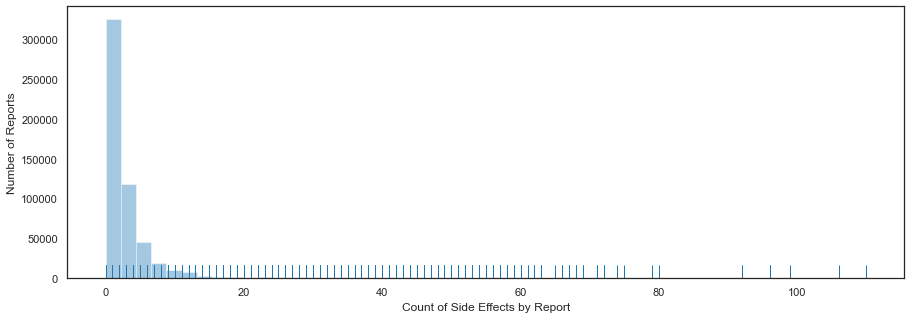

In [25]:
se_count_by_report = reactions_a.groupby('REPORT_ID')['PT_NAME_ENG','SOC_NAME_ENG'].count().sort_values(by='PT_NAME_ENG',ascending=True).reset_index()
se_count_by_report.tail(10)

sns.set_style("white")
sns.set_context('notebook')
fig, ax = plt.subplots()
fig.set_size_inches(15,5)

ax = sns.distplot(se_count_by_report.PT_NAME_ENG, kde=False, rug=True)
ax.set_xlabel('Count of Side Effects by Report')
ax.set_ylabel('Number of Reports')

plt.show()

In [26]:
from numpy import mean
from numpy import std
se_mean = mean(se_count_by_report.PT_NAME_ENG)
se_std = std(se_count_by_report.PT_NAME_ENG)
max_se = se_mean+3*se_std
print('mean :' + str(se_mean) + '\nstdev: ' + str(se_std))
print('upper bound: ' + str(max_se))

mean :3.03285702030205
stdev: 3.4931954743128335
upper bound: 13.51244344324055


In [27]:
included_reports = se_count_by_report[se_count_by_report.PT_NAME_ENG <= max_se]

In [28]:
reactions_a = reactions_a[reactions_a['REPORT_ID'].isin(included_reports['REPORT_ID'])]

In [29]:
# check row count
reactions_check = pd.concat([reactions[['REPORT_ID', 'PT_NAME_ENG']].nunique(), reactions_a[['REPORT_ID', 'PT_NAME_ENG']].nunique()], axis=1)
reactions_check.columns = ['Original','Processed']
reactions_check

,Original,Processed
REPORT_ID,536202,526322
PT_NAME_ENG,10408,9877


# 5. Merge Dataframes

In [30]:
merge_a = reports_b.merge(report_drug_c, how='left', left_on='REPORT_NO', right_on='REPORT_ID' , validate='one_to_many', copy=False)
merge_a.head()

,REPORT_NO,DATRECEIVED,DATINTRECEIVED,REPORT_TYPE_ENG,GENDER_ENG,AGE_Y,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,WEIGHT_KG,REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,DOSAGEFORM_ENG,CONCOMITANT_DRUGS
0,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0
1,142,1973-06-13,1973-06-13,Spontaneous,Female,55.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,63.0,10736,142,18327,INH,Suspect,Oral,TABLET,0.0
2,144,1973-06-13,1973-06-13,Spontaneous,Female,73.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital,73.0,73036,144,13471,ERYTHROMYCIN ESTOLATE CAPSULES,Suspect,Oral,CAPSULE,1.0
3,145,1973-06-13,1973-06-13,Spontaneous,Female,41.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Physician,NaN,NaN,1725310,145,34000,LIQUID EMBROIDERY AND SOLVENT,Suspect,NaN,NOT SPECIFIED,0.0
4,147,1973-06-13,1973-06-13,Spontaneous,Female,16.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
merge_b = merge_a.merge(drug_ingredients_a, how='left', on='DRUG_PRODUCT_ID', copy=False)
merge_b.head()

,REPORT_NO,DATRECEIVED,DATINTRECEIVED,REPORT_TYPE_ENG,GENDER_ENG,AGE_Y,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,WEIGHT_KG,REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME_x,DRUGINVOLV_ENG,ROUTEADMIN_ENG,DOSAGEFORM_ENG,CONCOMITANT_DRUGS,DRUG_PRODUCT_INGREDIENT_ID,DRUGNAME_y,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME
0,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891606624,INAPASADE-SQ,6624,para-aminosalicylic acid
1,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891606618,INAPASADE-SQ,6618,isoniazid
2,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891606006384,INAPASADE-SQ,6006384,pasiniazid
3,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891605009792,INAPASADE-SQ,5009792,isoniazide
4,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891606623,INAPASADE-SQ,6623,aminosalicylic acid


In [32]:
merge_c = merge_b.merge(reactions_a, how='left', on='REPORT_ID', copy=False)
merge_c.head()

,REPORT_NO,DATRECEIVED,DATINTRECEIVED,REPORT_TYPE_ENG,GENDER_ENG,AGE_Y,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,WEIGHT_KG,REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME_x,DRUGINVOLV_ENG,ROUTEADMIN_ENG,DOSAGEFORM_ENG,CONCOMITANT_DRUGS,DRUG_PRODUCT_INGREDIENT_ID,DRUGNAME_y,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME,REACTION_ID,PT_NAME_ENG,SOC_NAME_ENG
0,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891606624,INAPASADE-SQ,6624,para-aminosalicylic acid,14001,Dyspepsia,Gastrointestinal disorders
1,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891606618,INAPASADE-SQ,6618,isoniazid,14001,Dyspepsia,Gastrointestinal disorders
2,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891606006384,INAPASADE-SQ,6006384,pasiniazid,14001,Dyspepsia,Gastrointestinal disorders
3,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891605009792,INAPASADE-SQ,5009792,isoniazide,14001,Dyspepsia,Gastrointestinal disorders
4,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891606623,INAPASADE-SQ,6623,aminosalicylic acid,14001,Dyspepsia,Gastrointestinal disorders


In [33]:
merge_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3860144 entries, 0 to 3860143
Data columns (total 31 columns):
REPORT_NO                     object
DATRECEIVED                   datetime64[ns]
DATINTRECEIVED                datetime64[ns]
REPORT_TYPE_ENG               category
GENDER_ENG                    category
AGE_Y                         float64
SERIOUSNESS_ENG               category
DEATH                         category
DISABILITY                    category
CONGENITAL_ANOMALY            category
LIFE_THREATENING              category
HOSP_REQUIRED                 category
OTHER_MEDICALLY_IMP_COND      category
REPORTER_TYPE_ENG             category
SOURCE_ENG                    category
WEIGHT_KG                     float64
REPORT_DRUG_ID                object
REPORT_ID                     object
DRUG_PRODUCT_ID               object
DRUGNAME_x                    object
DRUGINVOLV_ENG                category
ROUTEADMIN_ENG                object
DOSAGEFORM_ENG                o

In [34]:
merge_c.nunique()

REPORT_NO                     433606
DATRECEIVED                    12691
DATINTRECEIVED                 12665
REPORT_TYPE_ENG                    7
GENDER_ENG                         4
AGE_Y                            615
SERIOUSNESS_ENG                    2
DEATH                              2
DISABILITY                         2
CONGENITAL_ANOMALY                 2
LIFE_THREATENING                   2
HOSP_REQUIRED                      2
OTHER_MEDICALLY_IMP_COND           2
REPORTER_TYPE_ENG                  6
SOURCE_ENG                         5
WEIGHT_KG                       3542
REPORT_DRUG_ID                324529
REPORT_ID                     324529
DRUG_PRODUCT_ID                15487
DRUGNAME_x                     12043
DRUGINVOLV_ENG                     1
ROUTEADMIN_ENG                    65
DOSAGEFORM_ENG                   225
CONCOMITANT_DRUGS                 63
DRUG_PRODUCT_INGREDIENT_ID    114510
DRUGNAME_y                     11165
ACTIVE_INGREDIENT_ID           12996
A

In [35]:
merge_c.to_csv(data_dir + 'merge_c.csv')

# 6. Limit to Active Ingredients and Reactions in SIDER/DrugBank
Reduce to useable observations.

In [36]:
# load SIDER 

sider = pd.read_csv(data_dir + 'sider/meddra_all_se.tsv', delimiter='\t', header=None,
                    names=['STITCH_FLAT','STITCH_STEREO', 'UMLS_CONCEPT_ID_LABEL','MEDDRA_CONCEPT_TYPE','UMLS_CONCEPT_ID_MEDDDRA','SE'],
                    usecols=[0,5])


# load DrugBank 

db_synonyms = pd.read_csv(data_dir + 'DrugBank/db/drug_syn.csv')
db_drugs = pd.read_csv(data_dir + 'DrugBank/db/drugs.csv', usecols=['primary_key','name'])

In [37]:
sider.head(2)

,STITCH_FLAT,SE
0,CID100000085,Abdominal cramps
1,CID100000085,Abdominal pain


In [38]:
db_synonyms.head(2)

,parent_key,synonym,language,coder
0,DB00001,Hirudin variant-1,english,NaN
1,DB00001,Lepirudin recombinant,english,NaN


In [39]:
db_drugs.head(2)

,primary_key,name
0,DB00001,Lepirudin
1,DB00002,Cetuximab


In [40]:
# filter for active ingrdients in DrugBank using names and synonyms
# there is room to improve drug name matching here

filter_a = merge_c[(merge_c['ACTIVE_INGREDIENT_NAME'].str.upper().isin(db_synonyms['synonym'].str.upper())) | 
                    (merge_c['ACTIVE_INGREDIENT_NAME'].str.upper().isin(db_drugs['name'].str.upper()))]

In [41]:
##  filter for Preferred MedDRA side effect terms using SIDER
filter_b = filter_a[filter_a['PT_NAME_ENG'].str.upper().isin(sider['SE'].str.upper())]

In [42]:
# check row count
filter_check = pd.concat([merge_c.nunique(), filter_a.nunique(), filter_b.nunique()], axis=1)
filter_check.columns = ['Original','Filter_a', 'Filter_b']
filter_check

,Original,Filter_a,Filter_b
REPORT_NO,433606,274094,260450
DATRECEIVED,12691,12050,12008
DATINTRECEIVED,12665,12041,12002
REPORT_TYPE_ENG,7,7,7
GENDER_ENG,4,4,4
AGE_Y,615,431,422
SERIOUSNESS_ENG,2,2,2
DEATH,2,2,2
DISABILITY,2,2,2
CONGENITAL_ANOMALY,2,2,2


In [43]:
#filter_b.to_parquet(data_dir + 'filter_b.parquet')

In [44]:
# free up memory
#%reset
#filter_b = pd.read_parquet(data_dir + 'filter_b.parquet')

In [45]:
filter_b.head()

,REPORT_NO,DATRECEIVED,DATINTRECEIVED,REPORT_TYPE_ENG,GENDER_ENG,AGE_Y,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,WEIGHT_KG,REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME_x,DRUGINVOLV_ENG,ROUTEADMIN_ENG,DOSAGEFORM_ENG,CONCOMITANT_DRUGS,DRUG_PRODUCT_INGREDIENT_ID,DRUGNAME_y,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME,REACTION_ID,PT_NAME_ENG,SOC_NAME_ENG
0,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891606624,INAPASADE-SQ,6624,para-aminosalicylic acid,14001,Dyspepsia,Gastrointestinal disorders
1,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891606618,INAPASADE-SQ,6618,isoniazid,14001,Dyspepsia,Gastrointestinal disorders
4,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891606623,INAPASADE-SQ,6623,aminosalicylic acid,14001,Dyspepsia,Gastrointestinal disorders
5,142,1973-06-13,1973-06-13,Spontaneous,Female,55.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,63.0,10736,142,18327,INH,Suspect,Oral,TABLET,0.0,1832706618,INH,6618,isoniazid,14201,Chills,General disorders and administration site cond...
6,142,1973-06-13,1973-06-13,Spontaneous,Female,55.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,63.0,10736,142,18327,INH,Suspect,Oral,TABLET,0.0,1832706618,INH,6618,isoniazid,14202,Rash,Skin and subcutaneous tissue disorders


In [46]:
filter_b.REPORT_TYPE_ENG.unique()

[Spontaneous, Study, Unknown, Special Access Program, Published, Safety Update Report, Other, NaN]
Categories (7, object): [Spontaneous, Study, Unknown, Special Access Program, Published, Safety Update Report, Other]

In [47]:
# Add a new binary column that indicates whether the listed side effect is in SIDER or not
# This will be the outcome variable

sider_pos = pd.read_csv(data_dir + 'sider_positives.csv')
sider_pos = sider_pos[['DRUG','ATC','SE', 'UMLS_CONCEPT_ID_MEDDDRA']]
sider_pos.head(2)


,DRUG,ATC,SE,UMLS_CONCEPT_ID_MEDDDRA
0,carnitine,A16AA01,Abdominal cramps,C0000729
1,carnitine,A16AA01,Abdominal pain,C0000737


In [48]:
df = filter_b.copy()
df_1 = df.merge(sider_pos, how='left', left_on=['ACTIVE_INGREDIENT_NAME','PT_NAME_ENG'], right_on=['DRUG','SE'])
df_1.head()

,REPORT_NO,DATRECEIVED,DATINTRECEIVED,REPORT_TYPE_ENG,GENDER_ENG,AGE_Y,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,WEIGHT_KG,REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME_x,DRUGINVOLV_ENG,ROUTEADMIN_ENG,DOSAGEFORM_ENG,CONCOMITANT_DRUGS,DRUG_PRODUCT_INGREDIENT_ID,DRUGNAME_y,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME,REACTION_ID,PT_NAME_ENG,SOC_NAME_ENG,DRUG,ATC,SE,UMLS_CONCEPT_ID_MEDDDRA
0,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891606624,INAPASADE-SQ,6624,para-aminosalicylic acid,14001,Dyspepsia,Gastrointestinal disorders,NaN,NaN,NaN,NaN
1,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891606618,INAPASADE-SQ,6618,isoniazid,14001,Dyspepsia,Gastrointestinal disorders,isoniazid,J04AC01,Dyspepsia,C0013395
2,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891606623,INAPASADE-SQ,6623,aminosalicylic acid,14001,Dyspepsia,Gastrointestinal disorders,NaN,NaN,NaN,NaN
3,142,1973-06-13,1973-06-13,Spontaneous,Female,55.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,63.0,10736,142,18327,INH,Suspect,Oral,TABLET,0.0,1832706618,INH,6618,isoniazid,14201,Chills,General disorders and administration site cond...,NaN,NaN,NaN,NaN
4,142,1973-06-13,1973-06-13,Spontaneous,Female,55.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,63.0,10736,142,18327,INH,Suspect,Oral,TABLET,0.0,1832706618,INH,6618,isoniazid,14202,Rash,Skin and subcutaneous tissue disorders,isoniazid,J04AC01,Rash,C0015230


In [49]:
df_1['POSITIVE'] = True

In [50]:
df_1.dtypes

REPORT_NO                             object
DATRECEIVED                   datetime64[ns]
DATINTRECEIVED                datetime64[ns]
REPORT_TYPE_ENG                     category
GENDER_ENG                          category
AGE_Y                                float64
SERIOUSNESS_ENG                     category
DEATH                               category
DISABILITY                          category
CONGENITAL_ANOMALY                  category
LIFE_THREATENING                    category
HOSP_REQUIRED                       category
OTHER_MEDICALLY_IMP_COND            category
REPORTER_TYPE_ENG                   category
SOURCE_ENG                          category
WEIGHT_KG                            float64
REPORT_DRUG_ID                        object
REPORT_ID                             object
DRUG_PRODUCT_ID                       object
DRUGNAME_x                            object
DRUGINVOLV_ENG                      category
ROUTEADMIN_ENG                        object
DOSAGEFORM

In [51]:
df_1['POSITIVE'] = df_1['UMLS_CONCEPT_ID_MEDDDRA'].notna()

In [52]:
df_1 = df_1[['REPORT_NO', 'DATRECEIVED', 'DATINTRECEIVED', 'REPORT_TYPE_ENG',
       'GENDER_ENG', 'AGE_Y', 'SERIOUSNESS_ENG', 'DEATH', 'DISABILITY',
       'CONGENITAL_ANOMALY', 'LIFE_THREATENING', 'HOSP_REQUIRED',
       'OTHER_MEDICALLY_IMP_COND', 'REPORTER_TYPE_ENG', 'SOURCE_ENG',
       'WEIGHT_KG', 'REPORT_DRUG_ID', 'REPORT_ID', 'DRUG_PRODUCT_ID',
       'DRUGNAME_x', 'DRUGINVOLV_ENG', 'ROUTEADMIN_ENG', 'DOSAGEFORM_ENG',
       'CONCOMITANT_DRUGS', 'DRUG_PRODUCT_INGREDIENT_ID', 'DRUGNAME_y',
       'ACTIVE_INGREDIENT_ID', 'ACTIVE_INGREDIENT_NAME', 'REACTION_ID',
       'PT_NAME_ENG', 'SOC_NAME_ENG', 'POSITIVE']].reset_index()

In [53]:
df_1.head(1)

,index,REPORT_NO,DATRECEIVED,DATINTRECEIVED,REPORT_TYPE_ENG,GENDER_ENG,AGE_Y,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,WEIGHT_KG,REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME_x,DRUGINVOLV_ENG,ROUTEADMIN_ENG,DOSAGEFORM_ENG,CONCOMITANT_DRUGS,DRUG_PRODUCT_INGREDIENT_ID,DRUGNAME_y,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME,REACTION_ID,PT_NAME_ENG,SOC_NAME_ENG,POSITIVE
0,0,140,1973-06-12,1973-06-12,Spontaneous,Male,48.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Community,64.0,357386,140,18916,INAPASADE-SQ,Suspect,Oral,NOT SPECIFIED,0.0,1891606624,INAPASADE-SQ,6624,para-aminosalicylic acid,14001,Dyspepsia,Gastrointestinal disorders,False


In [54]:
df_1.to_parquet(data_dir + 'df_1.parquet')

In [55]:
# %reset